In [25]:
import csv
import urllib.request
from  bs4 import BeautifulSoup
 
url = "http://www.weather.com.cn/weather/101190101.shtml"
header = ("User-Agent","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36")  # 设置头部信息
opener = urllib.request.build_opener()  # 修改头部信息
opener.addheaders = [header]         #修改头部信息
request = urllib.request.Request(url)   # 制作请求
response = urllib.request.urlopen(request)   #  得到请求的应答包
html = response.read()   #将应答包里面的内容读取出来
html = html.decode('utf-8')    # 使用utf-8进行编码，不重新编码就会成乱码
 
 
final = []   #初始化一个空的list，我们为将最终的的数据保存到list
bs = BeautifulSoup(html,"html.parser")   # 创建BeautifulSoup对象
body = bs.body  # 获取body部分
data = body.find('div',{'id':'7d'})  # 找到id为7d的div
ul = data.find('ul')  # 获取ul部分
li = ul.find_all('li')  # 获取所有的li
# print (li)
 
i = 0
for day in li:  # 对每个li标签中的内容进行遍历
    if i < 7:
        temp = []
        date = day.find('h1').string # 找到日期
        d = re.findall("\d+",date)[0]
        datetime = time.strftime("%Y/%m") + "/" + d
#         print (date)
        temp.append(datetime)  # 添加到temp中
    #     print (temp)
        inf = day.find_all('p')  # 找到li中的所有p标签
#     #     print(inf)
#     #     print (inf[0])
#         temp.append(inf[0].string)  # 第一个p标签中的内容（天气状况）加到temp中
        if inf[1].find('span') is None:
            temperature_highest = None # 天气预报可能没有当天的最高气温（到了傍晚，就是这样），需要加个判断语句,来输出最低气温
        else:
            temperature_highest = inf[1].find('span').string # 找到最高温度
            temperature_highest = temperature_highest.replace('℃', '') # 到了晚上网站会变，最高温度后面也有个℃
        temperature_lowest = inf[1].find('i').string  #找到最低温度
        temperature_lowest = temperature_lowest.replace('℃', '')  # # 最低温度后面有个℃，去掉这个符号
        temp.append(temperature_highest)
        temp.append(temperature_lowest)
        final.append(temp)
        i = i +1
        
# print(final)
 
with open('weather.csv', 'a', errors='ignore', newline='') as f:
            f_csv = csv.writer(f)
            f_csv.writerows(final)


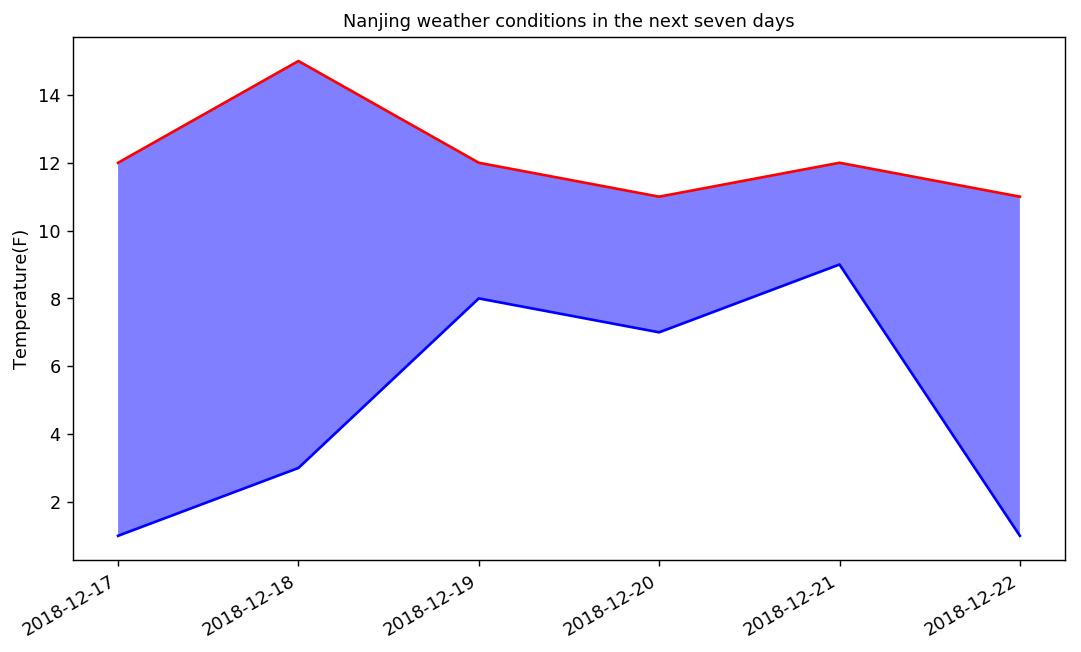

In [27]:
import csv
from matplotlib import pyplot as plt
from datetime import datetime

# filename = 'sitka_weather_07-2014.csv'
#要读取的文件
filename = 'weather.csv'

#打开文件并将文件结果对象存储到f中
with open(filename) as f:
    #创建一个与该文件相关联的阅读器(reader)对象，reader处理文件中以逗号分隔每一行的数据
    reader = csv.reader(f)
    #模块csv包含函数next()，将阅读器对象传递给它将返回文件的下一行
    headr_row = next(reader)

    dates,highs,lows = [],[],[]
    for row in reader:
        #datetime.strptime()设置时间日期
        current_date = datetime.strptime(row[0],"%Y/%m/%d")
        dates.append(current_date)

        high = int(row[1])
        highs.append(high)

        low = int(row[2])
        lows.append(low)

    # 数据可视化
    fig = plt.figure(dpi=128,figsize=(10,6))
    #红色显示最高气温，蓝色显示最低气温
    plt.plot(dates,highs,c='red')
    plt.plot(dates,lows,c = 'blue')
    #向fill_between()函数传递一个x值：dates 两个y值：highs,lows 中间填充色:blue 透明度:0.5
    plt.fill_between(dates,highs,lows,facecolor = 'blue',alpha=0.5)

    #设置图形的格式
    plt.title("Nanjing weather conditions in the next seven days",fontsize=10)
    plt.xlabel('',fontsize=5)
    #来绘制斜的日期标签
    fig.autofmt_xdate()
    plt.ylabel("Temperature(F)",fontsize = 10)
    plt.tick_params(axis='both',which='major',labelsize = 10)
    plt.show()